In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc

In [25]:
# Load the dataset
data = pd.read_csv('creditcard.csv')

In [26]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in the dataset:")
print(missing_values)

Missing values in the dataset:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       1
Amount    1
Class     1
dtype: int64


In [27]:
# Drop rows with missing values
data = data.dropna()

In [28]:
# Separate features and target variable
X = data.drop(columns=['Class'])
y = data['Class']

In [29]:
# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [30]:
# Handle class imbalance using RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_normalized, y)

In [31]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [32]:
# Create a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)

In [33]:
# Train the classifier on the training data
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [34]:
# Predict on the testing data
y_pred = clf.predict(X_test)

In [35]:
# Evaluate the model's performance using precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [36]:
# Display performance metrics
print("Performance Metrics:")
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Performance Metrics:
Precision: 0.9998463146247003
Recall: 1.0
F1-score: 0.9999231514070978


In [37]:
# Confusion Matrix
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.xticks([0, 1], ['Predicted Genuine', 'Predicted Fraudulent'])
    plt.yticks([0, 1], ['True Genuine', 'True Fraudulent'])
    plt.show()

In [38]:
# ROC Curve
def plot_roc_curve(y_true, y_pred):
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

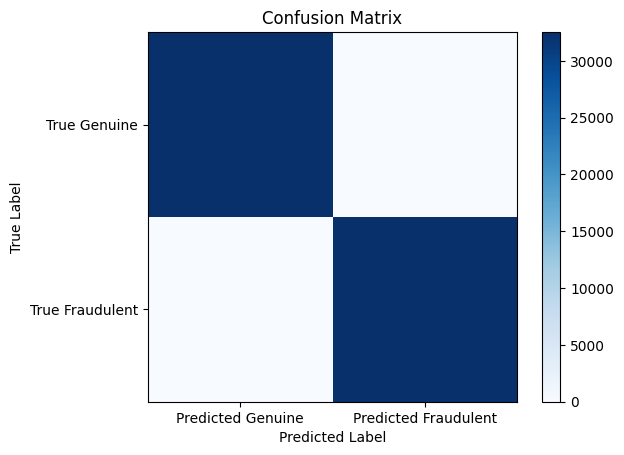

In [39]:
# Plot Confusion Matrix
plot_confusion_matrix(y_test, y_pred)

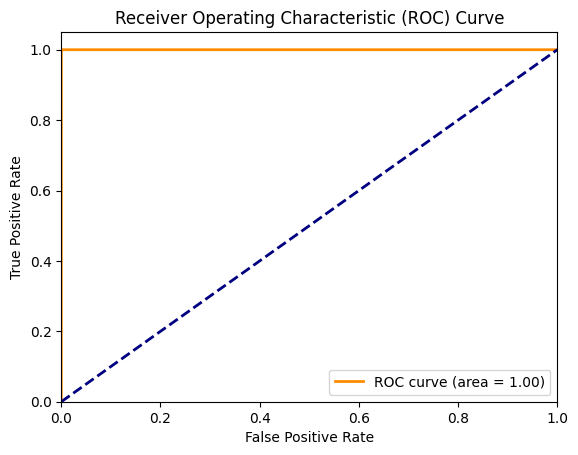

In [40]:
# Plot ROC Curve
plot_roc_curve(y_test, y_pred)